# ADS Assignment 10.


**Hi everyone. The assignment focuses on what you have learned in the Unsupervised Machine Learning notes. Use the following link to source your data for the exercise on Sales Conversion Optimization: https://www.kaggle.com/loveall/clicks-conversion-tracking.**

Ensure you have read and understood the instructions about the data including what is in each column so as to correctly answer the questions below. You are expected to finish and submit your notebooks latest by Friday at 5 PM. All the best.
1. Import the libraries and load the data.
2. Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.
3. Using a heat map to show the correlation in the data.
a. Drop the first 4 columns in the data frame X.
b. Basing your answer on what can be seen in the heat map, why did we drop these columns?
4. Using the elbow method:
a. Determine the best number of clusters for the data in the range of 2 to 20.
b. Also include the graphical plot for the elbow curve.
5. Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.
6. Use the model to predict the labels from the data and save them to variable y_means.
7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.
8. Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:
a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?
b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?
9. Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.

**Description**

**The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.**

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
kag = pd.read_csv("KAG_conversion_data.csv")
kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
kag.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
kag.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
kag.duplicated().sum()

0

**Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.**

In [7]:
X = pd.get_dummies(kag, columns = ['age','gender'])
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


**Using a heat map to show the correlation in the data.**

a. Drop the first 4 columns in the data frame X. 

b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

<AxesSubplot:>

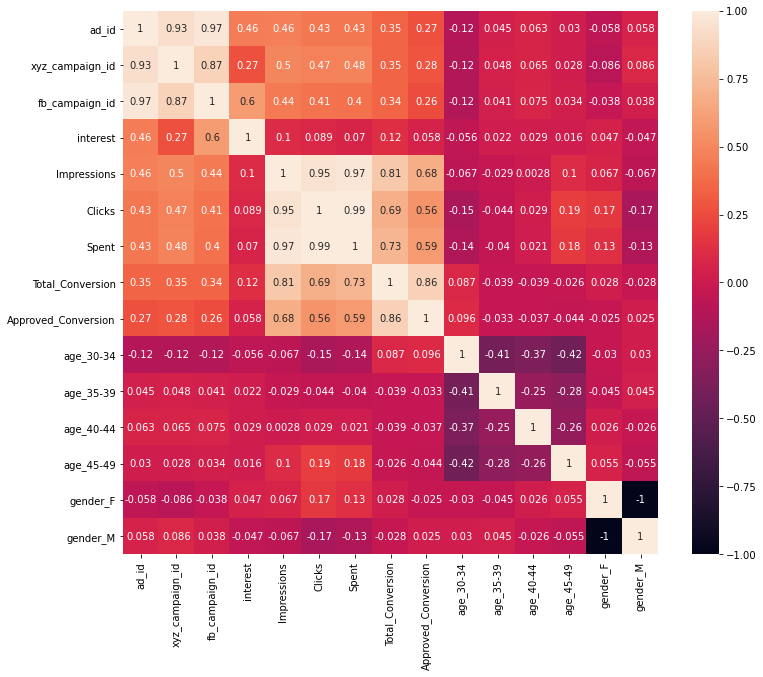

In [8]:
cor = X.corr()
plt.figure(figsize = (12,10))
sns.heatmap(cor, annot = True)

In [9]:
X.shape

(1143, 15)

In [10]:
X1 = X.drop(['ad_id','xyz_campaign_id','fb_campaign_id','Impressions'], axis = 1)
X1.head()

,interest,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,15,1,1.43,2,1,1,0,0,0,0,1
1,16,2,1.82,2,0,1,0,0,0,0,1
2,20,0,0.00,1,0,1,0,0,0,0,1
3,28,1,1.25,1,0,1,0,0,0,0,1
4,28,1,1.29,1,1,1,0,0,0,0,1


the dropped columns are negatively correlated to Approved_Conversion which is our most likely output column

**Using the elbow method:**

a. Determine the best number of clusters for the data in the range of 2 to 20. 

b. Also include the graphical plot for the elbow curve.

In [11]:
from sklearn.cluster import KMeans

In [12]:
%%time
wcss = []
for i in range(2,20):
    kmeans = KMeans(i)
    kmeans.fit(X1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

Wall time: 7.07 s


[4257884.544075658,
 2574103.699187068,
 1868528.8228732457,
 1434696.3718653012,
 1119405.238585422,
 862020.0732587929,
 747753.8519836367,
 652076.1655356485,
 570676.2086419173,
 510562.69582262554,
 450850.52563293534,
 397509.5709039576,
 365366.56860209565,
 337467.05122099706,
 305620.4009384063,
 287438.6038586554,
 273081.7410618458,
 249940.90070293113]

Text(0, 0.5, 'Within Clusters Sum of Squares')

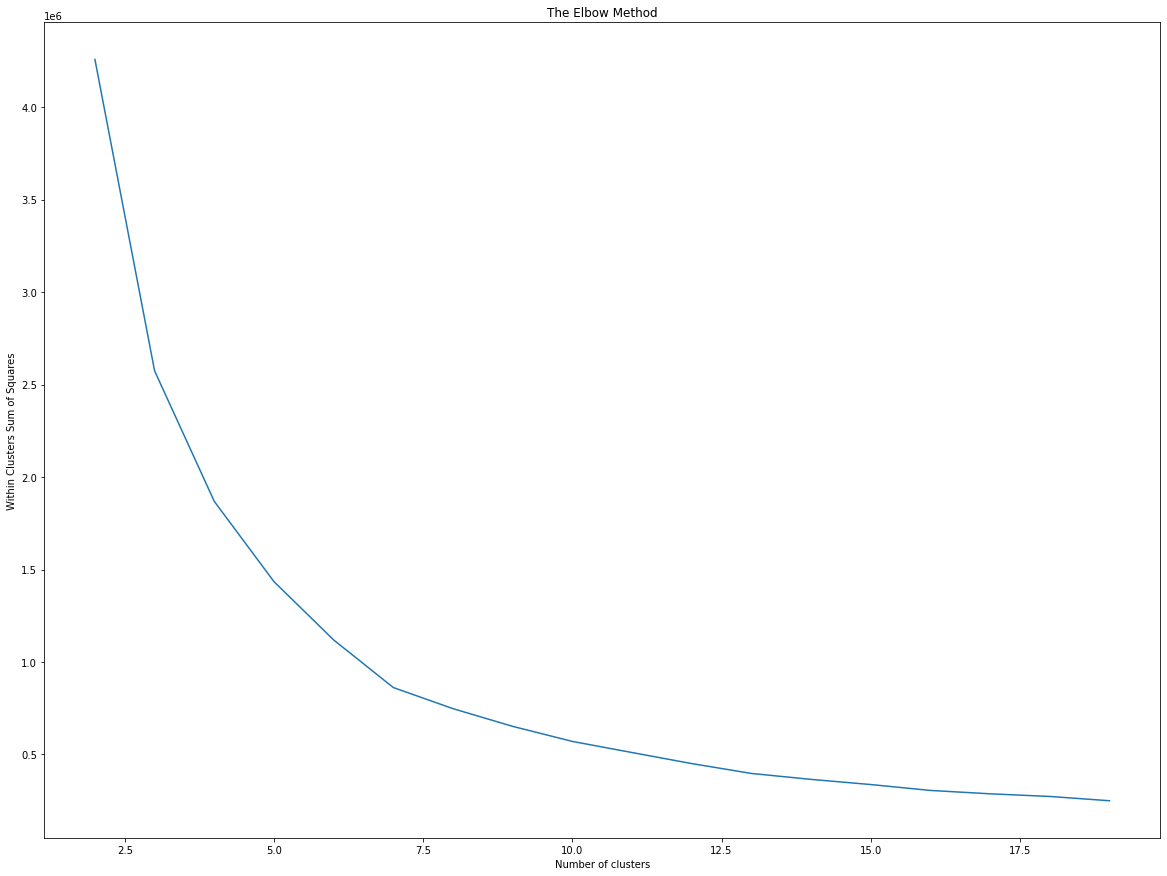

In [13]:
number_clusters = range(2,20)
plt.figure(figsize = (20,15))
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within Clusters Sum of Squares")

**Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.**

In [14]:
X1.columns

Index(['interest', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'age_30-34', 'age_35-39', 'age_40-44',
       'age_45-49', 'gender_F', 'gender_M'],
      dtype='object')

In [15]:
km = KMeans(8)
xfeatures = X1[['interest', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'age_30-34', 'age_35-39', 'age_40-44',
       'age_45-49', 'gender_F', 'gender_M']]

km.fit(xfeatures)

KMeans()

In [16]:
y_means = km.fit_predict(xfeatures)
y_means

array([1, 1, 1, ..., 4, 5, 5])

In [17]:
km.labels_


array([1, 1, 1, ..., 4, 5, 5])

In [18]:
y_means is km.labels_

True

In [19]:
km.cluster_centers_

array([[ 3.50238095e+01,  1.65761905e+02,  2.54965237e+02,
         1.12857143e+01,  3.73809524e+00,  2.14285714e-01,
         2.14285714e-01,  2.14285714e-01,  3.57142857e-01,
         6.66666667e-01,  3.33333333e-01],
       [ 2.08269231e+01,  3.22727273e+00,  4.82533216e+00,
         1.19930070e+00,  4.26573427e-01,  4.56293706e-01,
         2.11538462e-01,  1.60839161e-01,  1.71328671e-01,
         4.52797203e-01,  5.47202797e-01],
       [ 3.83020833e+01,  6.87604167e+01,  1.08326354e+02,
         4.45833333e+00,  1.39583333e+00,  2.39583333e-01,
         2.08333333e-01,  2.29166667e-01,  3.22916667e-01,
         4.58333333e-01,  5.41666667e-01],
       [ 3.99310345e+01,  2.36310345e+02,  3.55563448e+02,
         1.30000000e+01,  4.31034483e+00,  1.72413793e-01,
         1.37931034e-01,  2.41379310e-01,  4.48275862e-01,
         7.24137931e-01,  2.75862069e-01],
       [ 8.10129032e+01,  1.15483871e+01,  1.72652903e+01,
         1.77419355e+00,  6.00000000e-01,  3.67741935e-01,
  

In [20]:
X1['y_means'] = y_means
X1.head()

,interest,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,y_means
0,15,1,1.43,2,1,1,0,0,0,0,1,1
1,16,2,1.82,2,0,1,0,0,0,0,1,1
2,20,0,0.00,1,0,1,0,0,0,0,1,1
3,28,1,1.25,1,0,1,0,0,0,0,1,1
4,28,1,1.29,1,1,1,0,0,0,0,1,1


In [21]:
kag['Advert_Type'] = y_means
kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


**Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:** 

a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets? 

b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

In [22]:
kag.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
Advert_Type              int32
dtype: object

C:\Users\SKETCH3D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='Approved_Conversion'>

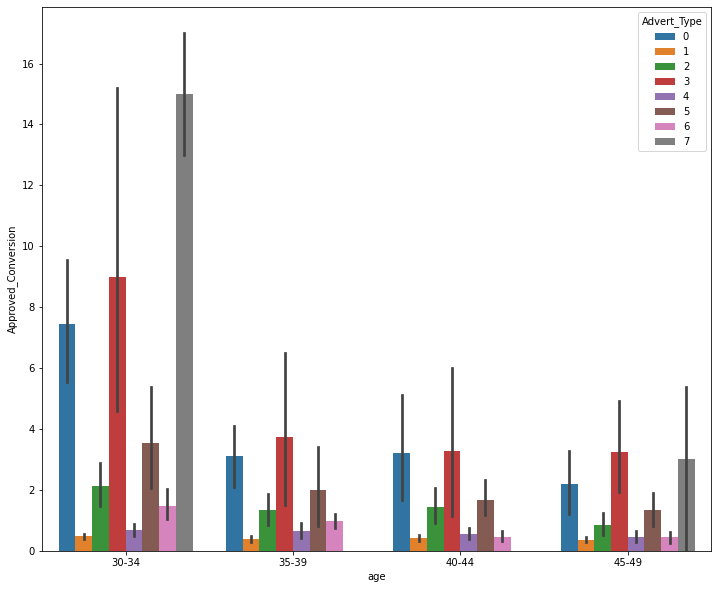

In [23]:
plt.figure(figsize = (12,10))
sns.barplot(kag.age, kag.Approved_Conversion, hue = 'Advert_Type', data = kag)

 advert type 3 leads to the highest and consistent amount of sales by customers of all age brackets.

C:\Users\SKETCH3D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='Spent'>

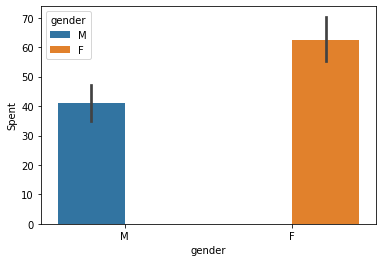

In [24]:
sns.barplot(kag.gender, kag.Spent, hue = 'gender', data = kag)

yes company XYZ has gender bias as they spent more on selling the ad to females than the males

C:\Users\SKETCH3D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='Approved_Conversion'>

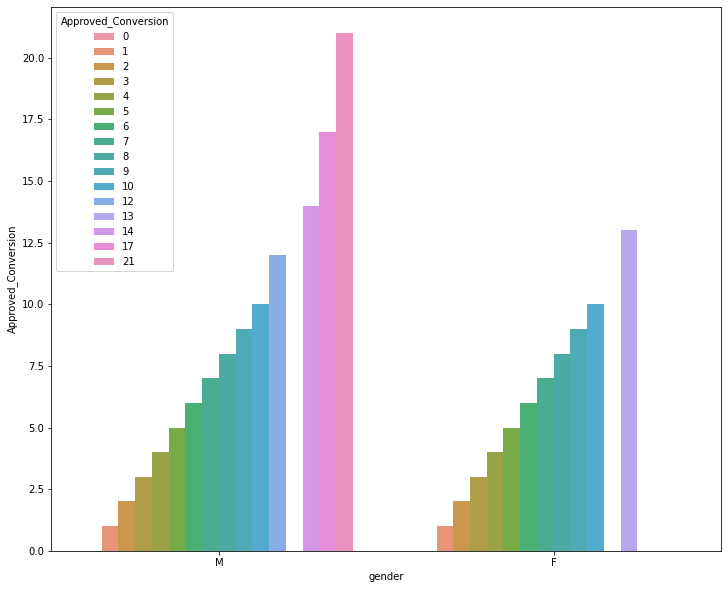

In [25]:
plt.figure(figsize = (12,10))
sns.barplot(kag.gender, kag.Approved_Conversion,hue = 'Approved_Conversion',  data = kag)

Company XYZ's products are gender neutral since both  males and females have shown to mapprove their conversion

**Perform the same analysis using hierarchical clustering and compare the results in terms of the number of useable clusters.**

In [26]:
import scipy.cluster.hierarchy as shc

In [27]:
X1.head()

,interest,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,y_means
0,15,1,1.43,2,1,1,0,0,0,0,1,1
1,16,2,1.82,2,0,1,0,0,0,0,1,1
2,20,0,0.00,1,0,1,0,0,0,0,1,1
3,28,1,1.25,1,0,1,0,0,0,0,1,1
4,28,1,1.29,1,1,1,0,0,0,0,1,1


In [29]:
data = X1.iloc[:, 0:11].values

Wall time: 8.42 s


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [97.5, 97.5, 142.5, 142.5],
  [25.625, 25.625, 120.0, 120.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [173.75, 173.75, 210.0, 210.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [286.25, 286.25, 330.0, 330.0],
  [233.75, 233.75, 308.125, 

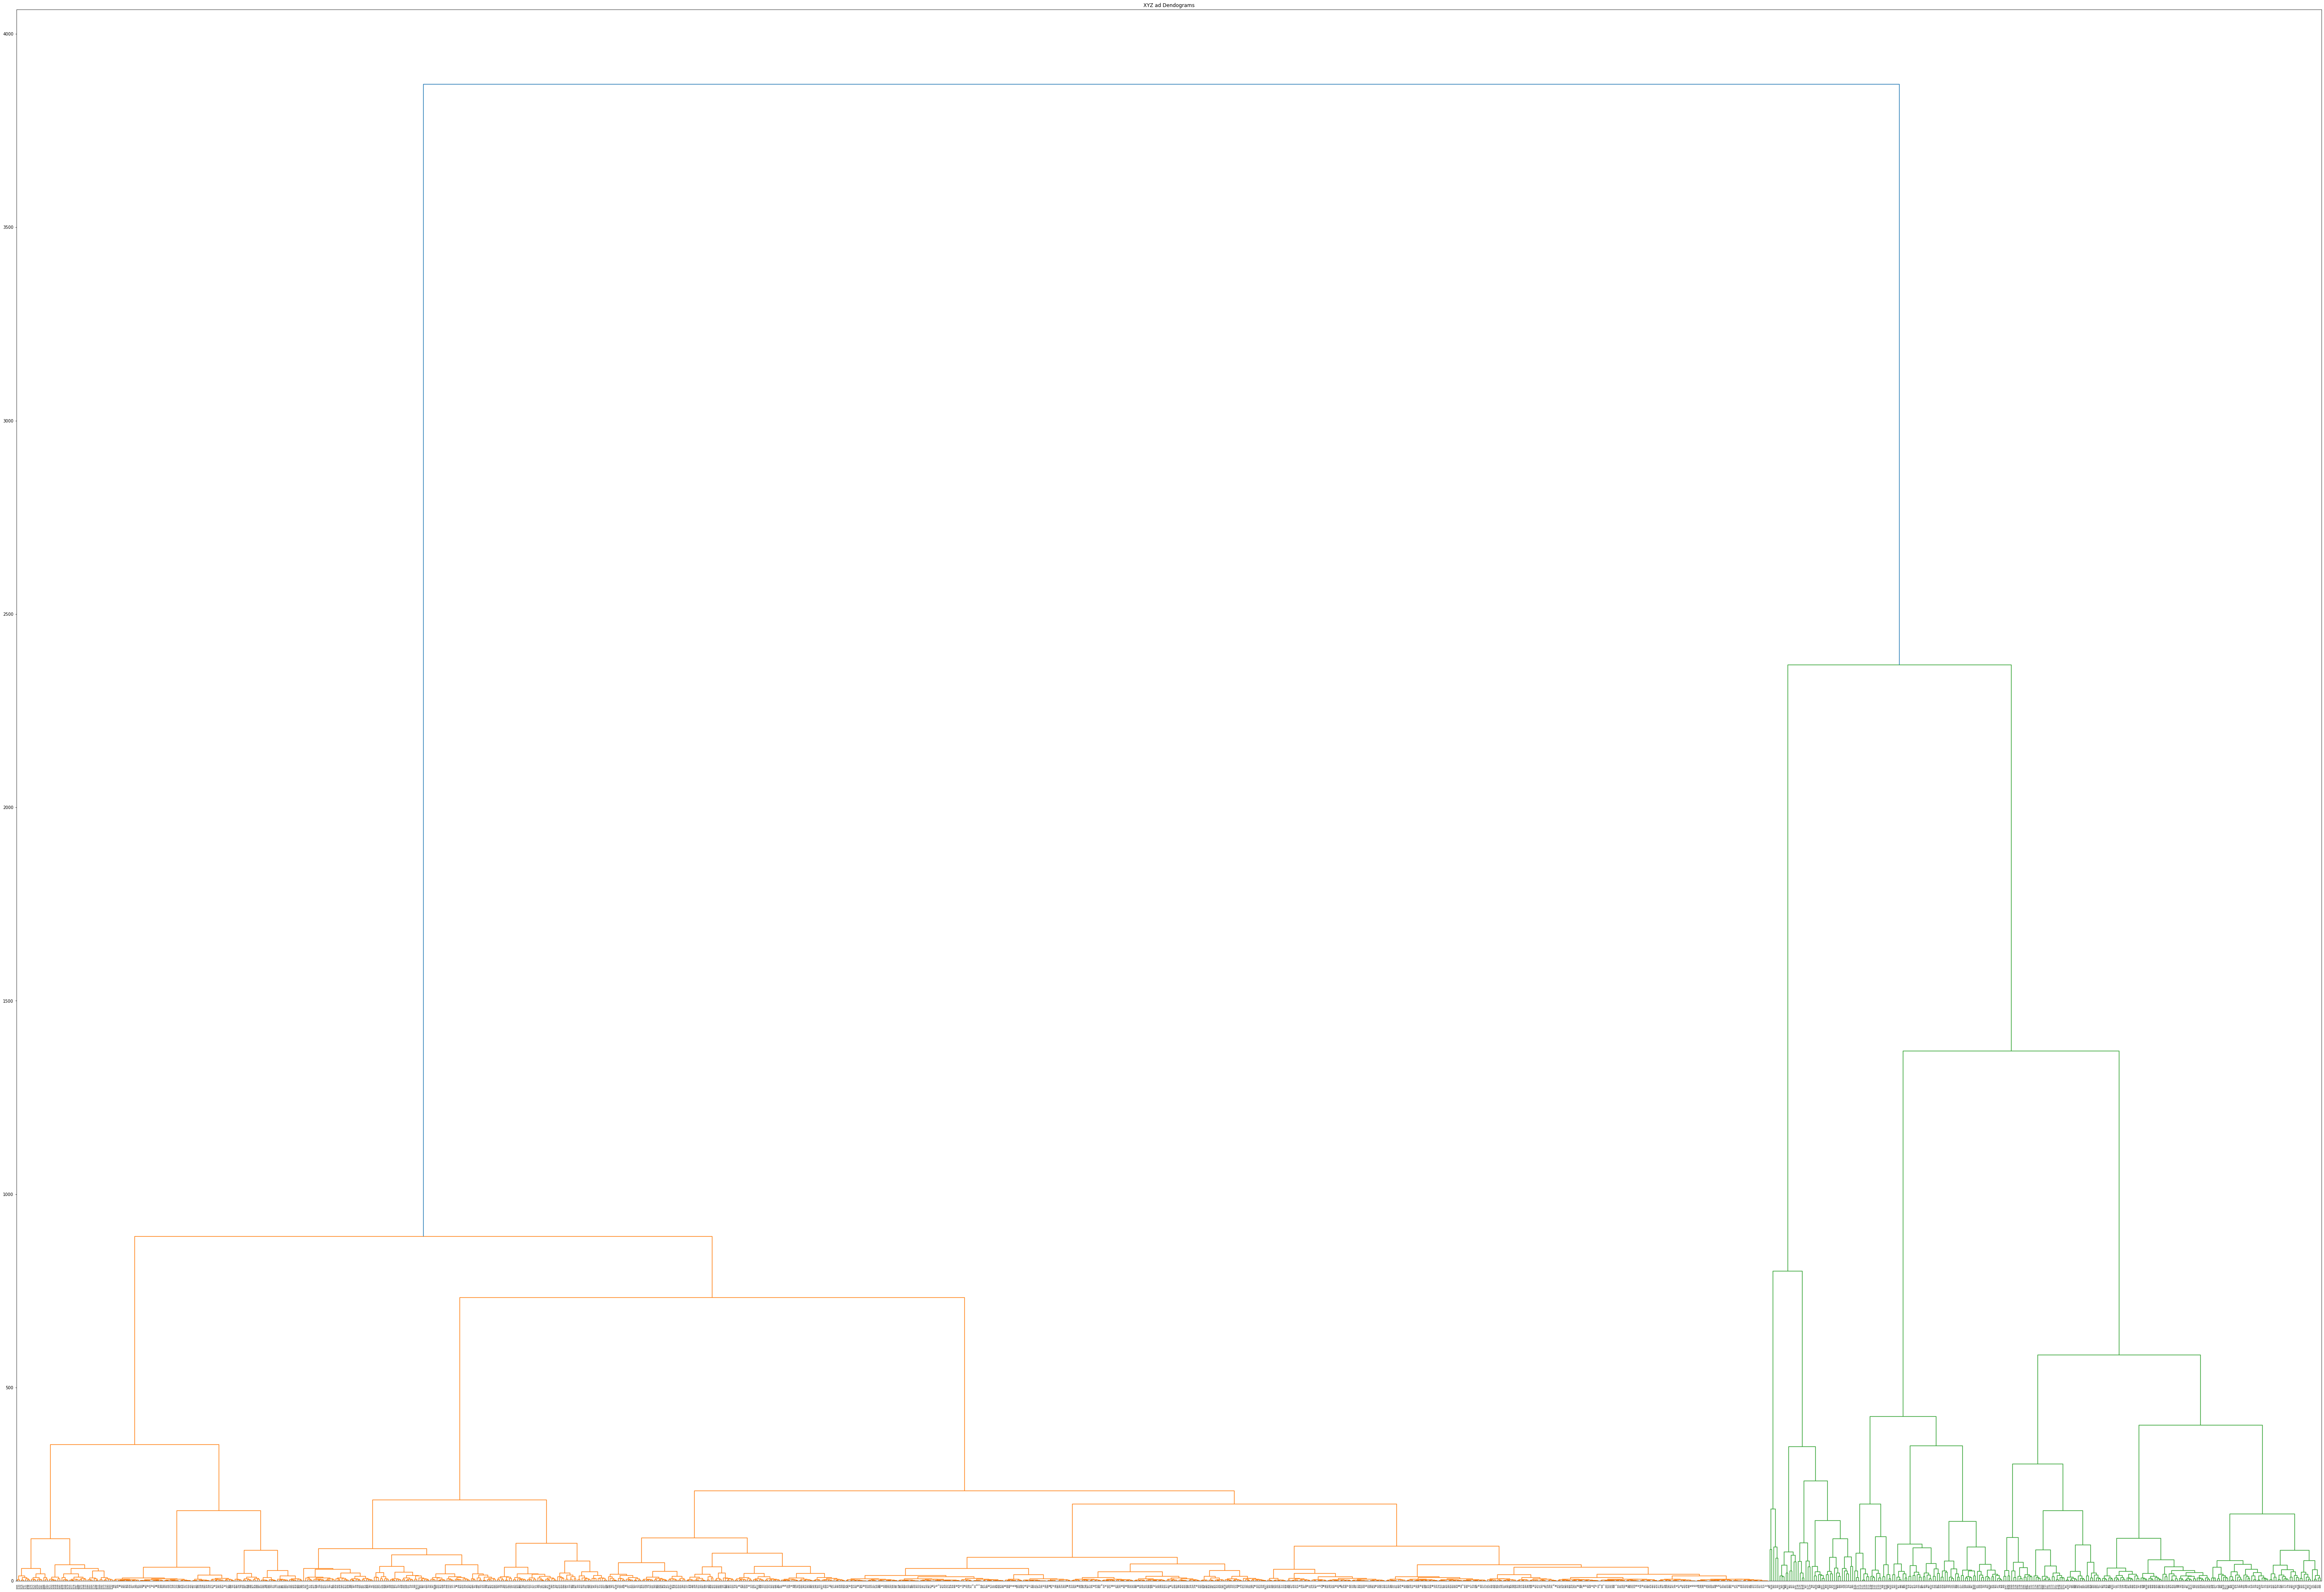

In [34]:
%%time
plt.figure(figsize=(100, 70))
plt.title("XYZ ad Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
dend